In [1]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import os

from M3RefTracking import M3RefTracking
from DetectorConfigLoader import DetectorConfigLoader
from Detector import Detector
from DreamDetector import DreamDetector
from DreamData import DreamData

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency
from detector_characterization import filter_ray_xy

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ss1_test_12-18-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run_1'

det_single = 'strip_strip_1'

# file_nums = list(range(0, 10))
file_nums = 'all'

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position
z_rot_range = [-5, 5]

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 20/20 [00:00<00:00, 41.96it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 450}
Detector center: [  0   0 799]
Detector active size: [130 130   4]
Reading in data...


100%|██████████| 20/20 [00:02<00:00,  7.89it/s]


Read in data shape: (27125, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 46.03it/s]


Fitting time: 0.40851426124572754 s
Processed chunk 1/1
Getting hits...
Hits shape: (27125, 256)


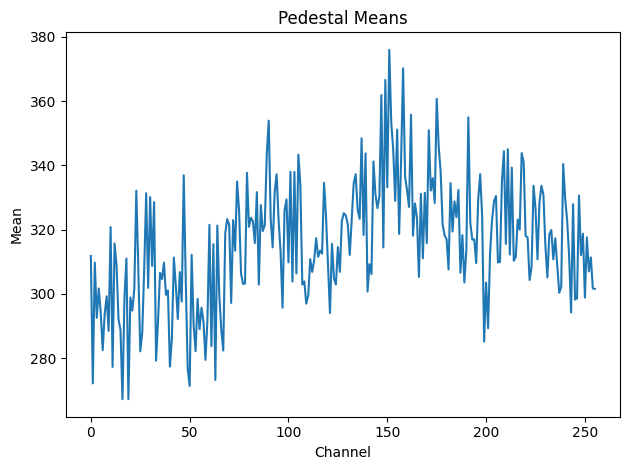

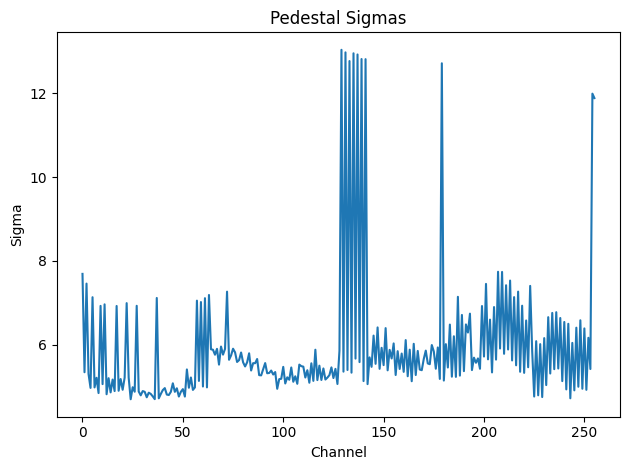

In [6]:
det.dream_data.plot_pedestals()

C:\Users\Dylan\PycharmProjects\saclay_micromegas\DreamData.py:678: RuntimeWarning: invalid value encountered in divide
  max_amp_div_sum = event_max_amps / event_amp_sums


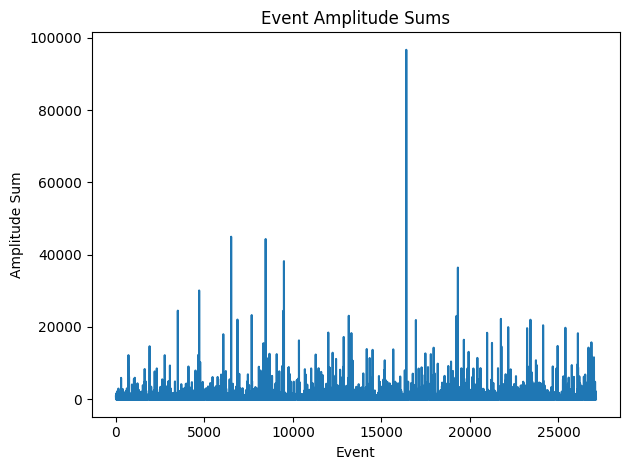

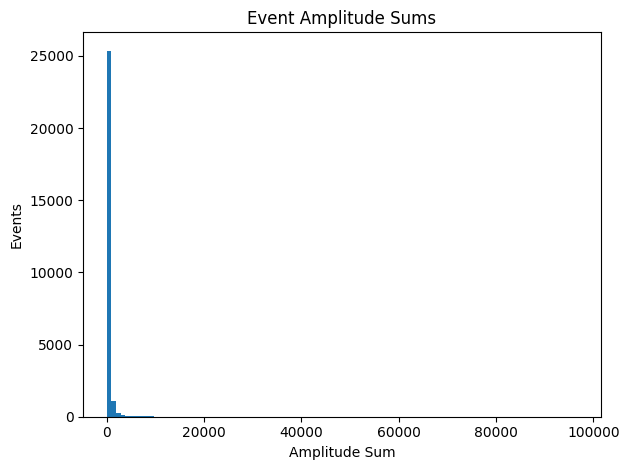

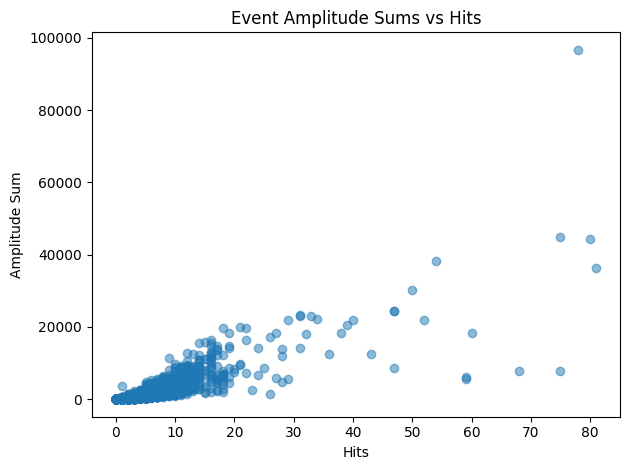

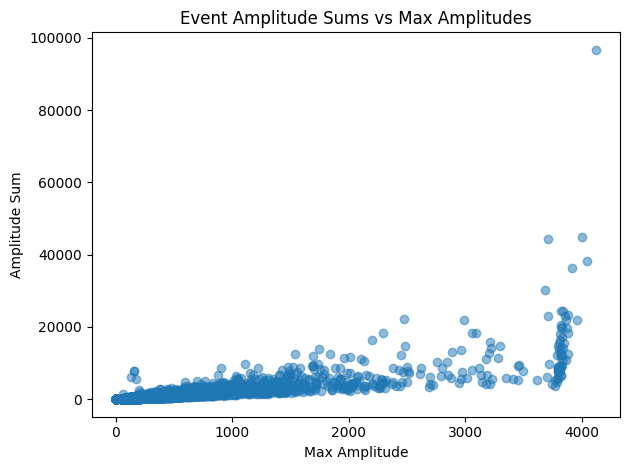

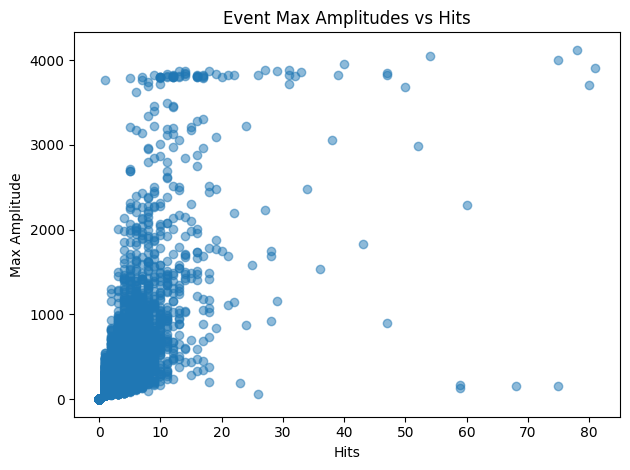

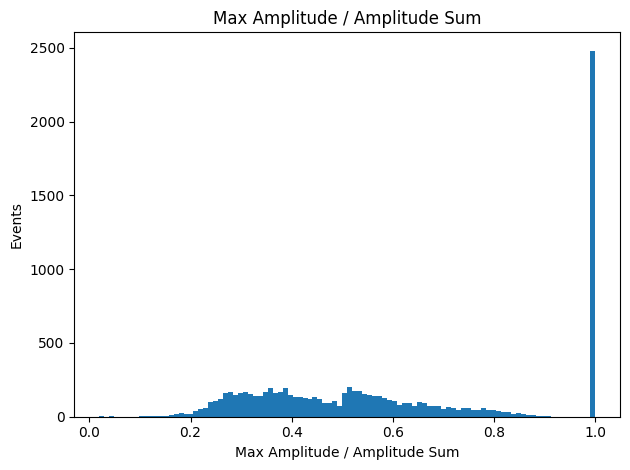

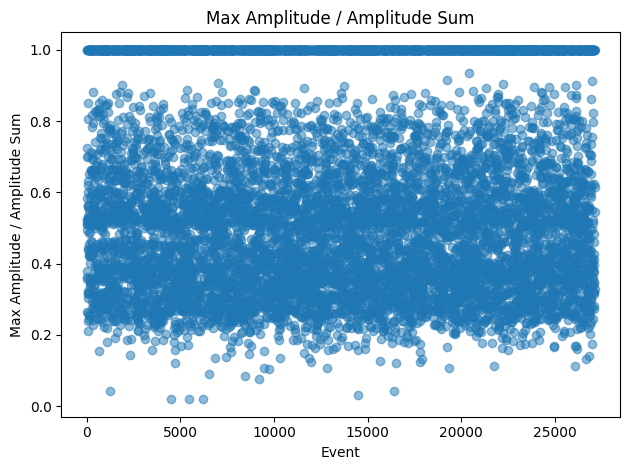

In [7]:
det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [0 2]
Connector 2 Dead Strips: []
Connector 3 Dead Strips: [129 131 133 135 137 139 141 179]
Connector 4 Dead Strips: [240 241 242 243 244 245 246 247 248 249 250 252 253 254 255]


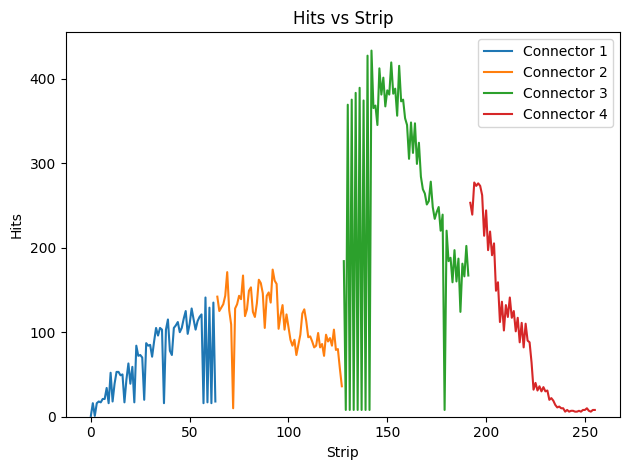

In [8]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

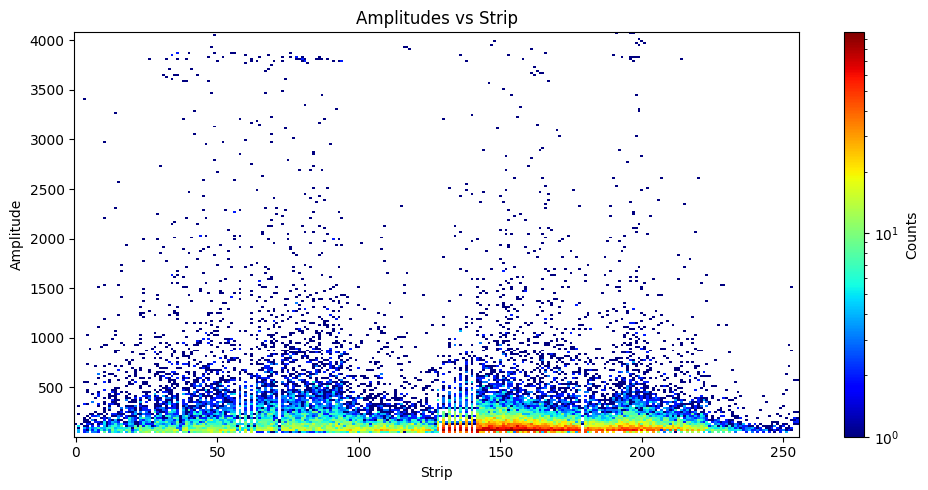

In [9]:
det.dream_data.plot_amplitudes_vs_strip()

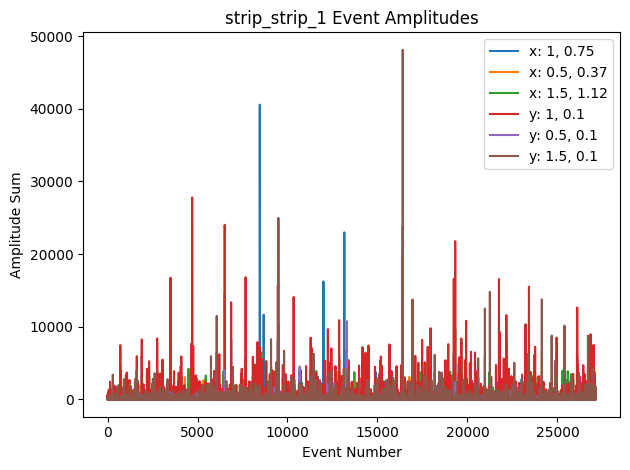

In [10]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

Detector center: [  0   0 799]
Detector rotations: []


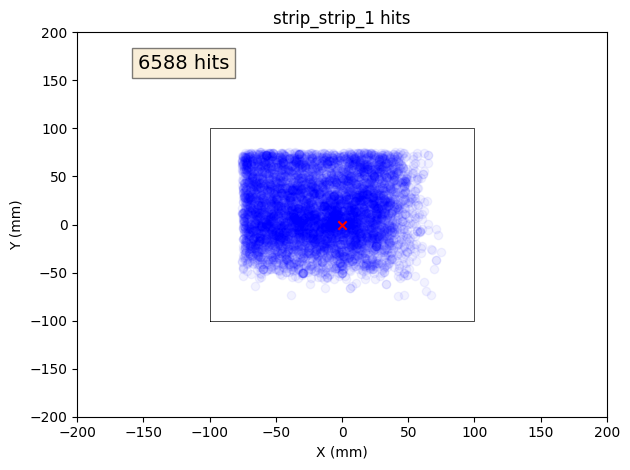

In [11]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

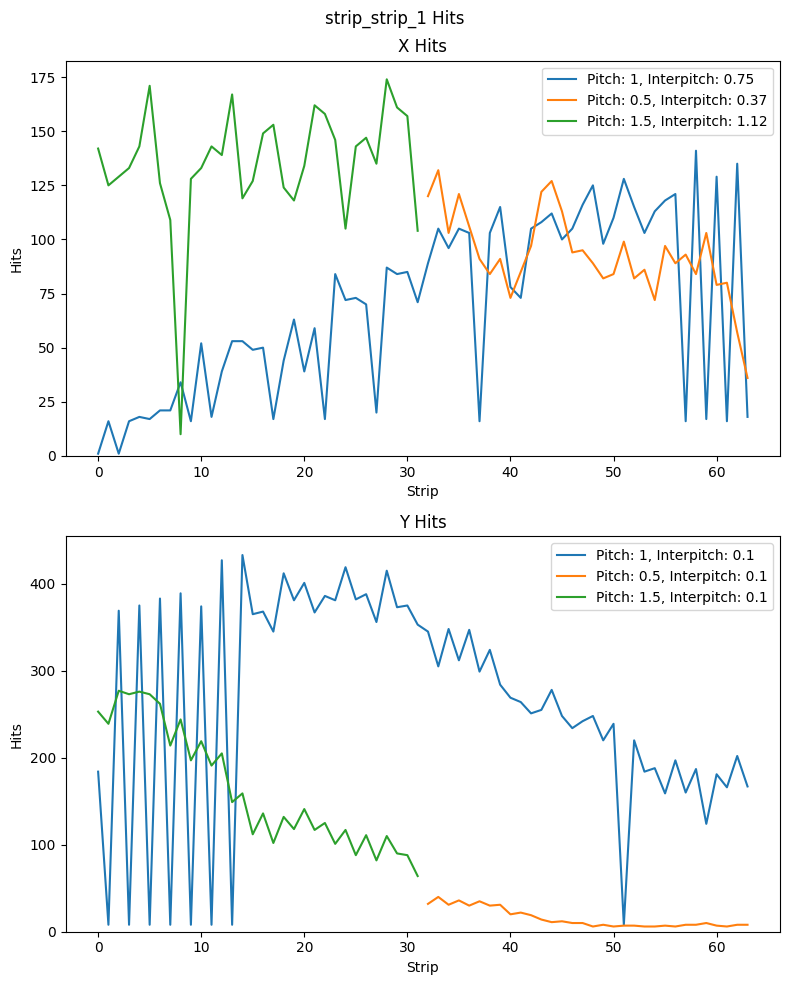

In [12]:
det.plot_hits_1d()

In [13]:
print(len(det.dream_data.hits))

27125


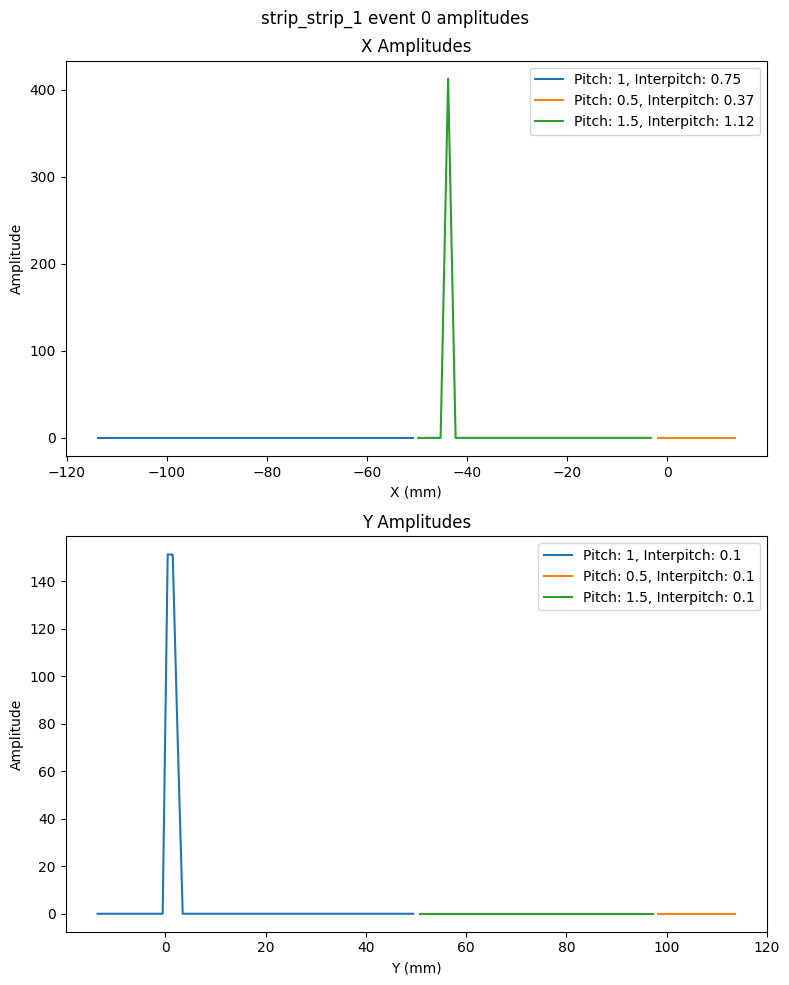

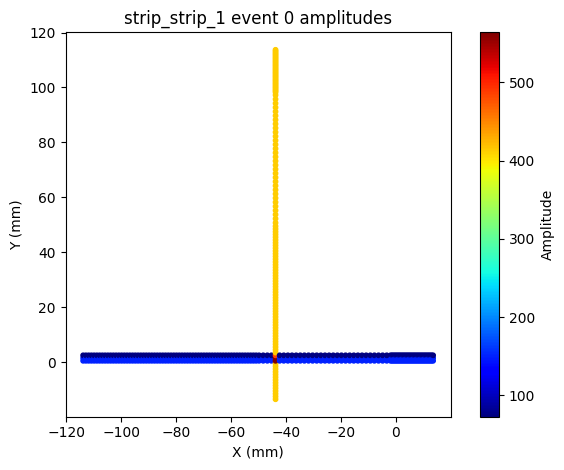

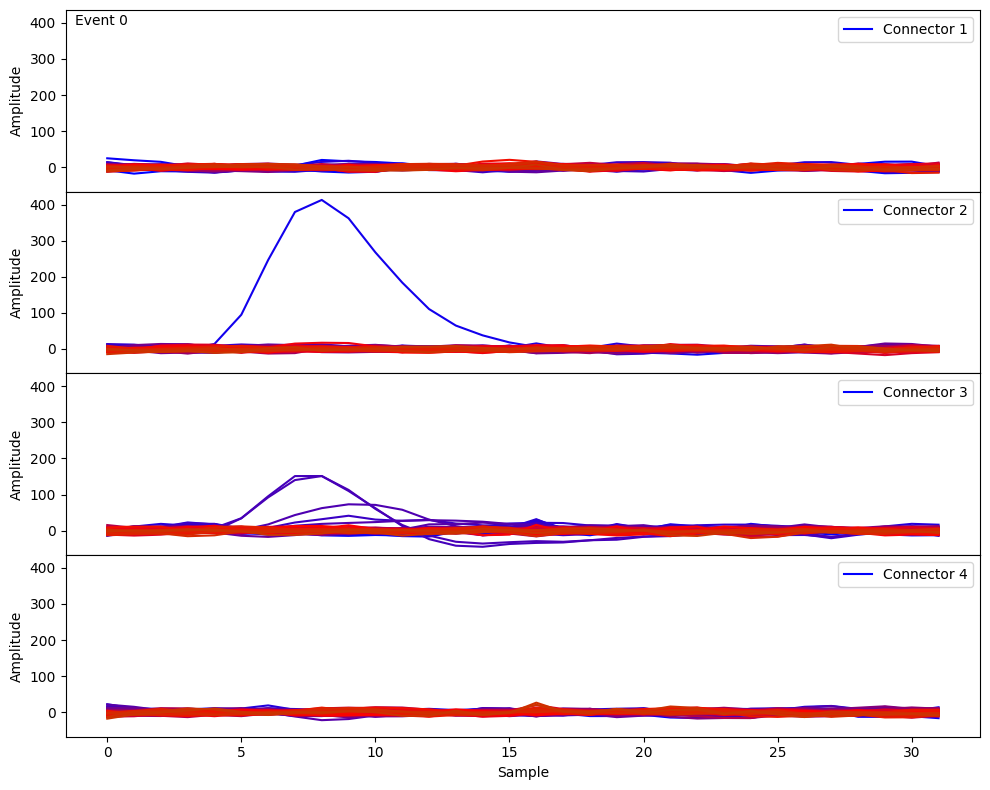

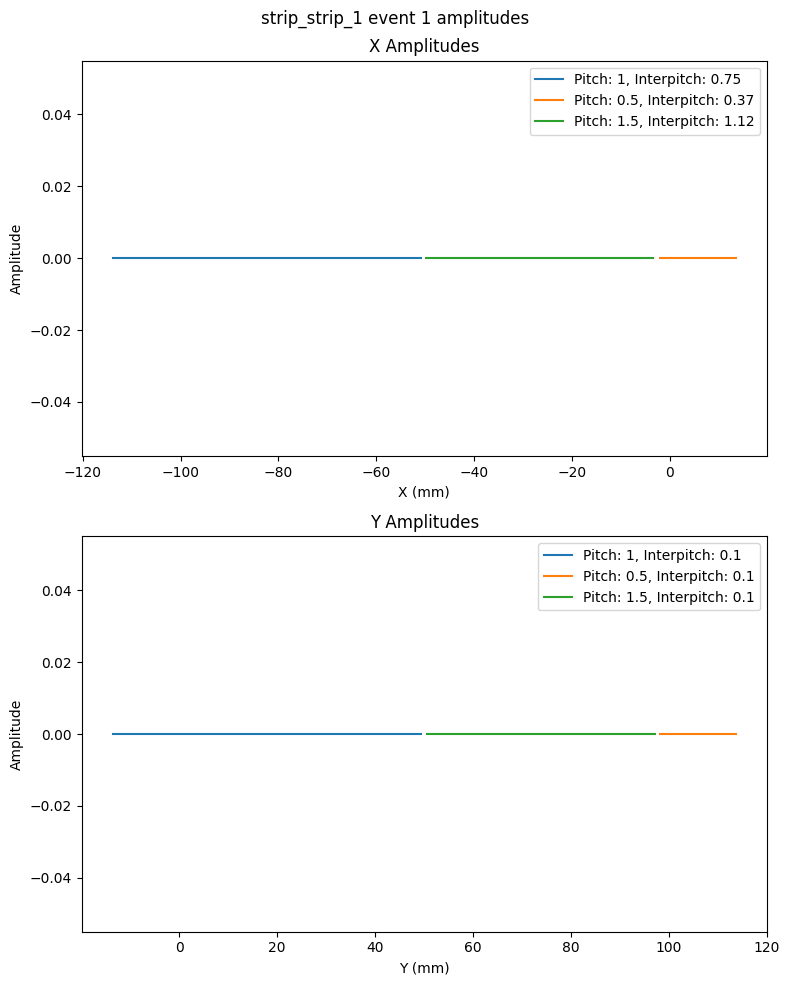

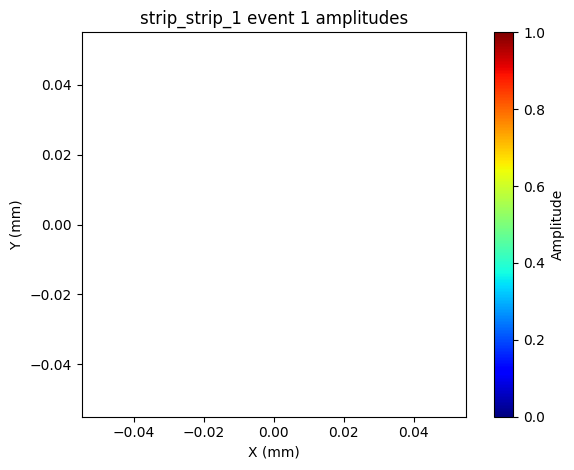

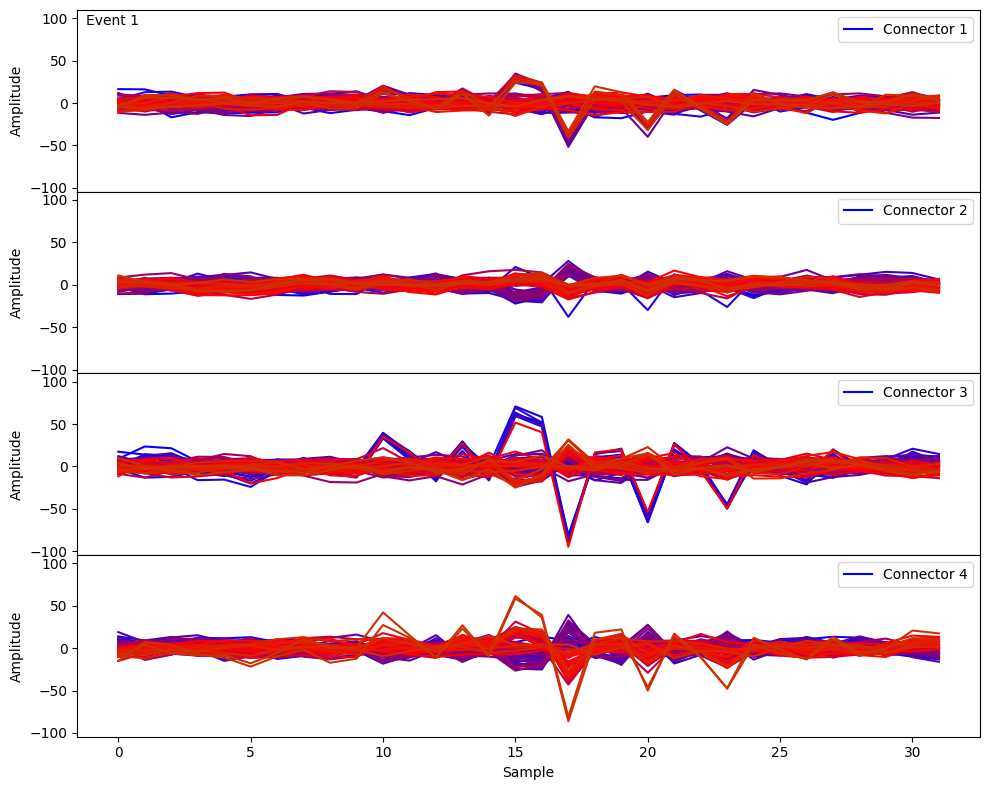

In [14]:
for event_num in range(min(len(det.dream_data.hits), 2)):
    det.plot_event_1d(event_num)
    det.plot_event_2d(event_num)
    det.dream_data.plot_waveforms(event_num)

z: 709.0
z: 709.3448275862069
z: 709.6896551724138
z: 710.0344827586207
z: 710.3793103448276
z: 710.7241379310345
z: 711.0689655172414
z: 711.4137931034483
z: 711.7586206896551
z: 712.1034482758621
z: 712.448275862069
z: 712.7931034482758
z: 713.1379310344828
z: 713.4827586206897
z: 713.8275862068965
z: 714.1724137931035
z: 714.5172413793103
z: 714.8620689655172
z: 715.2068965517242
z: 715.551724137931
z: 715.8965517241379
z: 716.2413793103449
z: 716.5862068965517
z: 716.9310344827586
z: 717.2758620689655
z: 717.6206896551724
z: 717.9655172413793
z: 718.3103448275862
z: 718.6551724137931
z: 719.0
z_rot: -5.0
z_rot: -4.655172413793103
z_rot: -4.310344827586206
z_rot: -3.9655172413793105
z_rot: -3.6206896551724137
z_rot: -3.275862068965517
z_rot: -2.9310344827586206
z_rot: -2.586206896551724
z_rot: -2.2413793103448274
z_rot: -1.8965517241379306
z_rot: -1.5517241379310343
z_rot: -1.206896551724138
z_rot: -0.8620689655172411
z_rot: -0.5172413793103443
z_rot: -0.1724137931034484
z_rot: 0.17

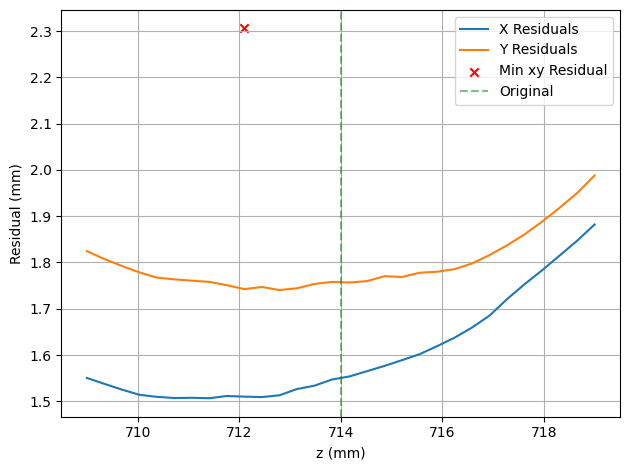

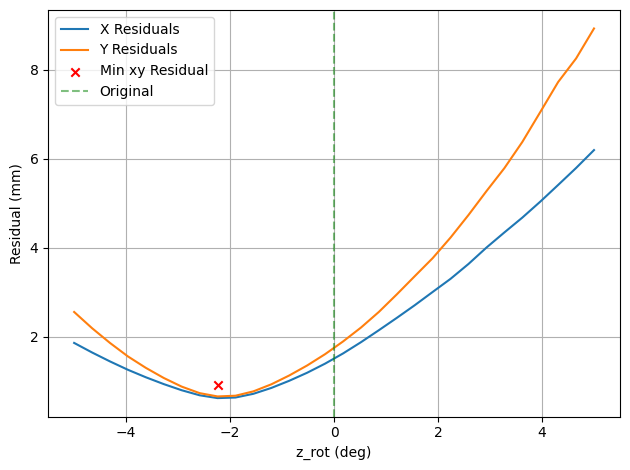

In [15]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

det.center[2] -= 85

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    # det.add_rotation(-90, 'z')
    align_dream(det, ray_data, z_align_range, z_rot_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

Detector center: [ 87.4736411   47.65572047 712.10344828]
Detector rotations: [[-2.2413793103448274, 0, 0]]


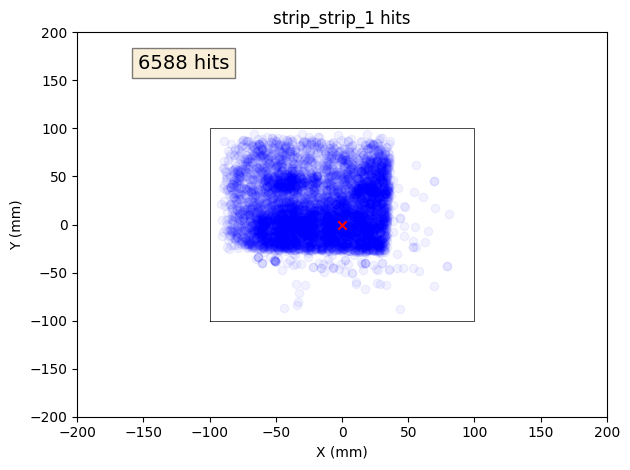

In [16]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

Pre-filtered rays: 136110
All rays: 57895
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices: []
Bad event num indices:

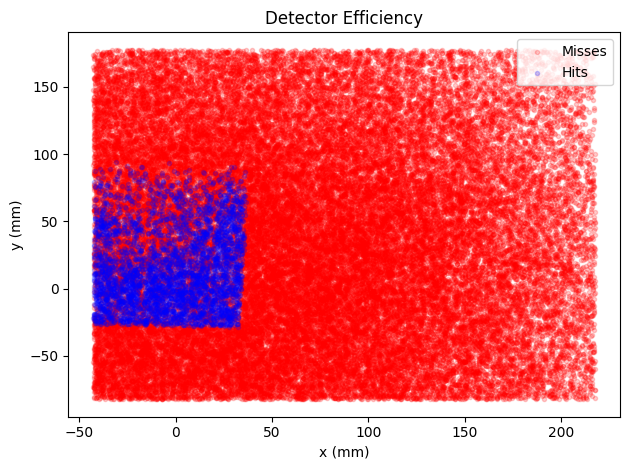

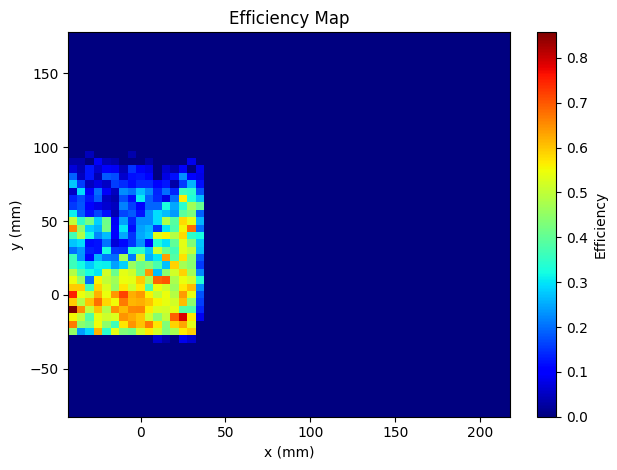

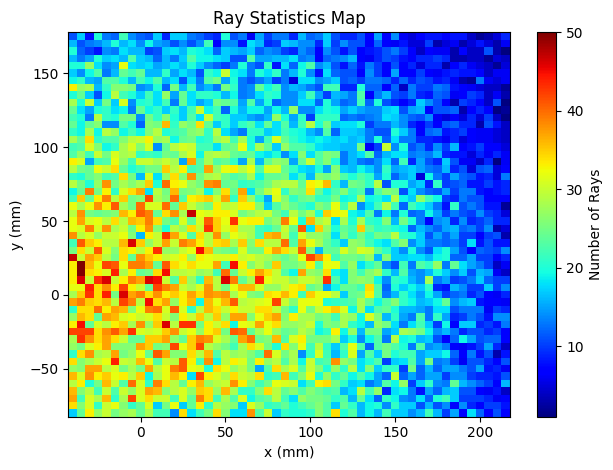

In [17]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2)

X Residuals: Mean=-65μm, Std=582μm
Y Residuals: Mean=59μm, Std=665μm
Error fitting residuals for pitch: (1, 0.5) mm, interpitch: (0.75, 0.1) mm
X Residuals: Mean=47μm, Std=566μm
Y Residuals: Mean=92μm, Std=543μm
X Residuals: Mean=-15μm, Std=474μm
Y Residuals: Mean=-121μm, Std=619μm
Error fitting residuals for pitch: (0.5, 0.5) mm, interpitch: (0.37, 0.1) mm


C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:870: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(ncols=2)


X Residuals: Mean=4μm, Std=485μm
Y Residuals: Mean=-22μm, Std=539μm
X Residuals: Mean=-45μm, Std=682μm
Y Residuals: Mean=-49μm, Std=656μm
X Residuals: Mean=490μm, Std=278μm
Y Residuals: Mean=11μm, Std=718μm
X Residuals: Mean=137μm, Std=602μm
Y Residuals: Mean=-26μm, Std=590μm


(-0.013729702572854295,
 -0.005680028741481118,
 0.5960338660482254,
 0.6272867309585439)

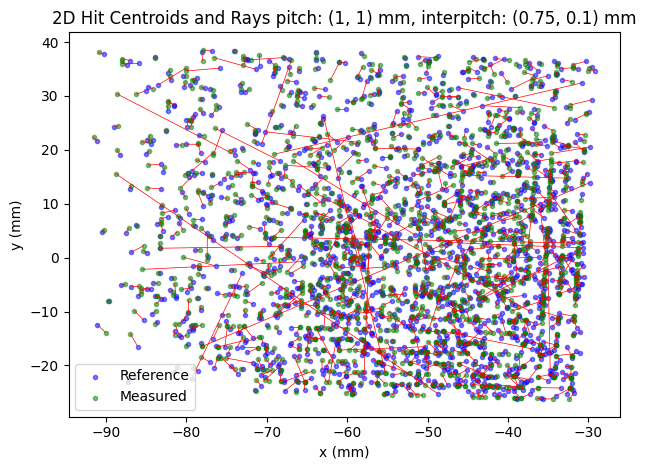

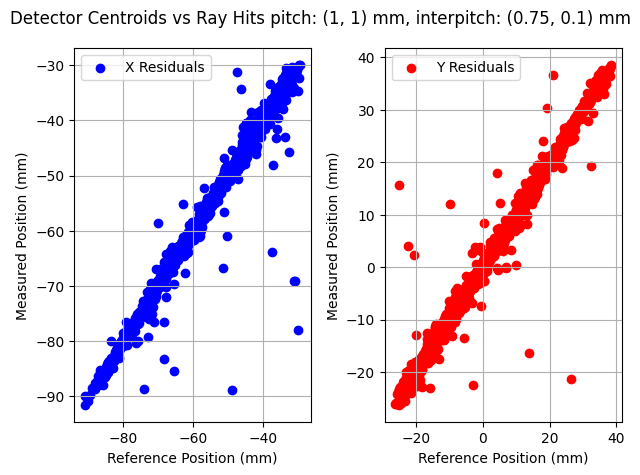

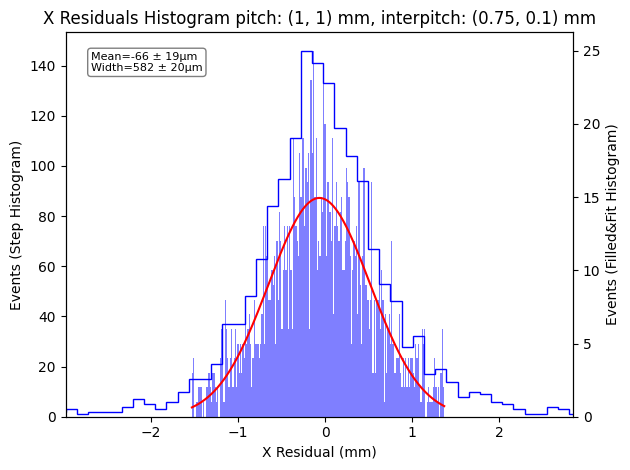

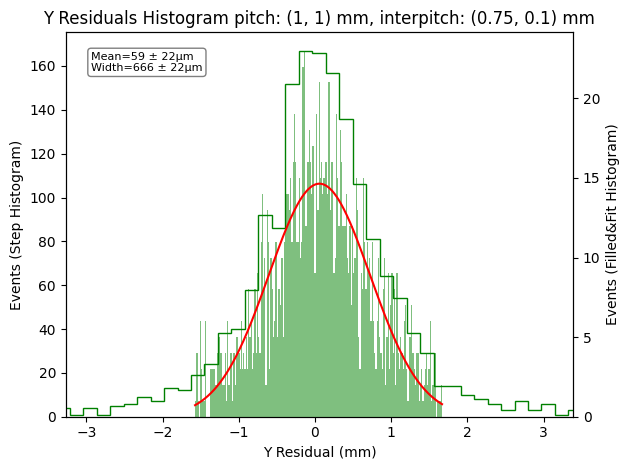

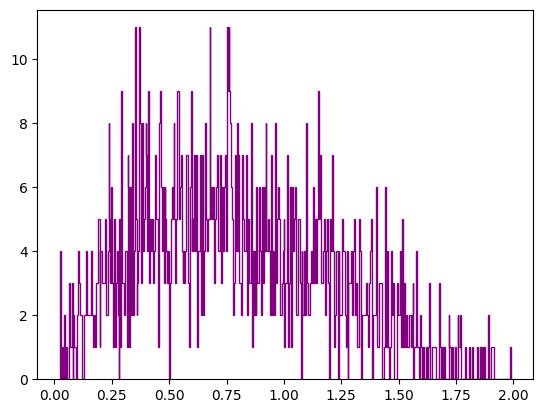

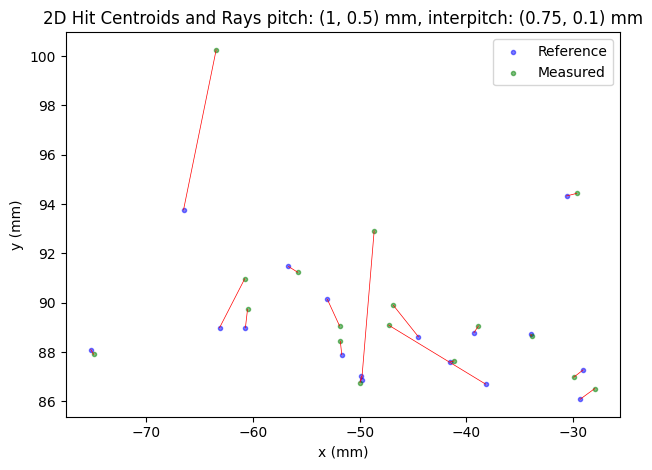

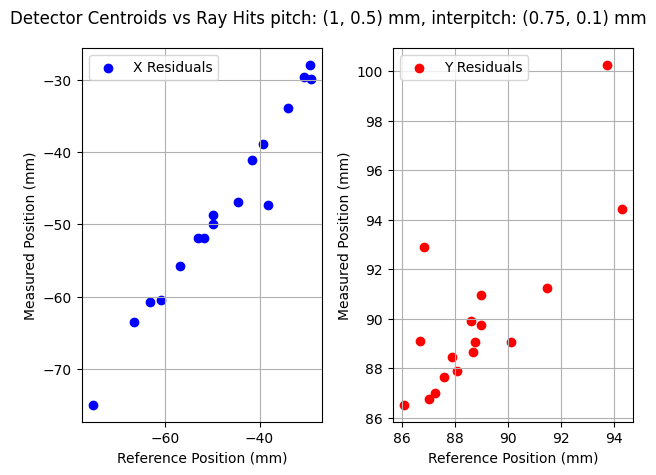

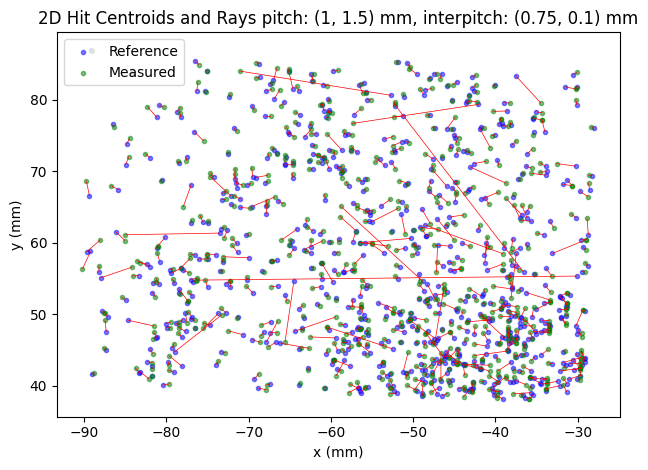

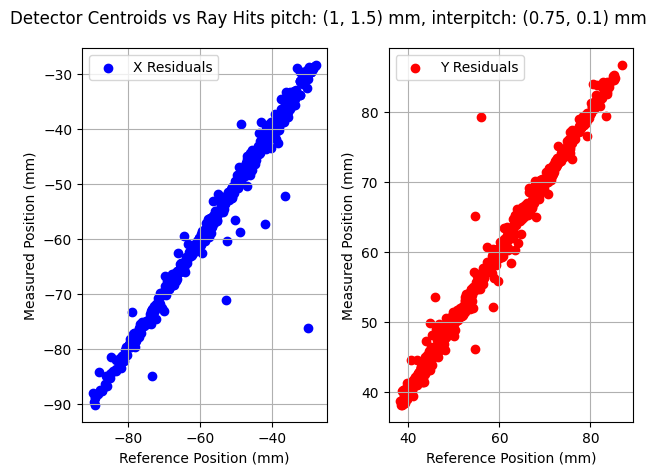

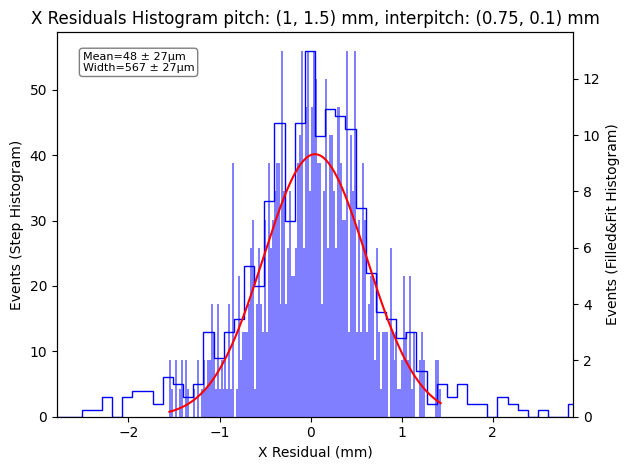

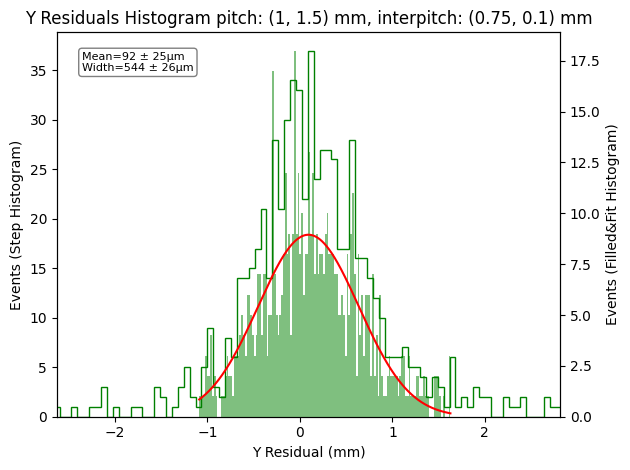

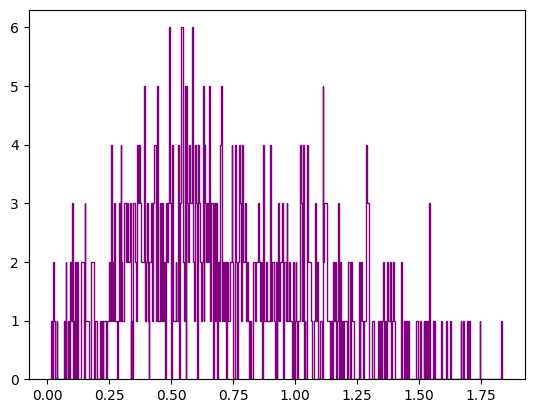

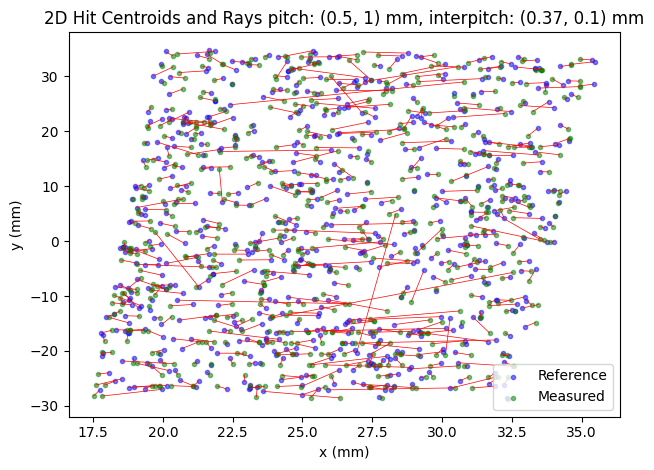

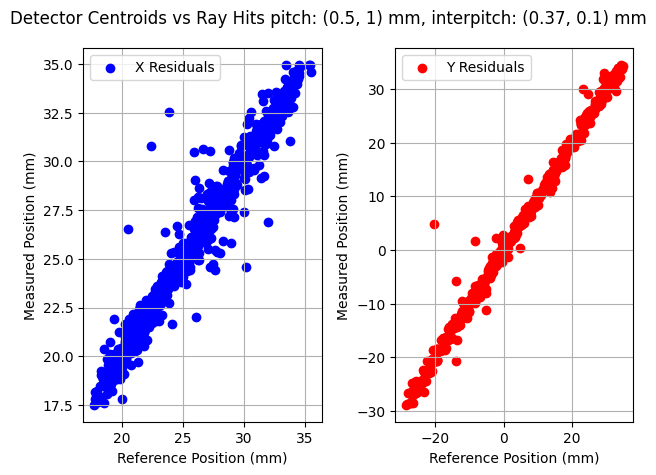

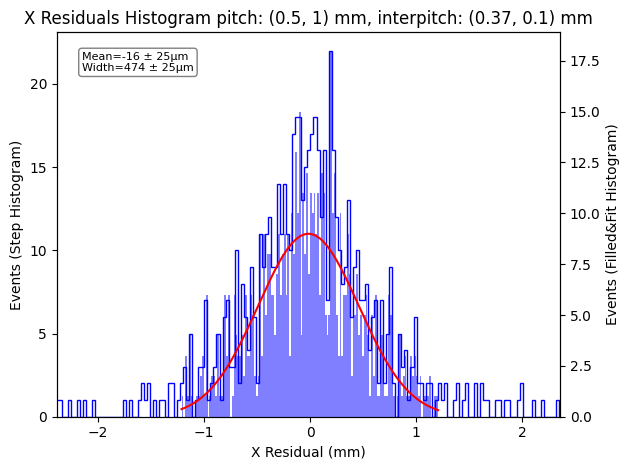

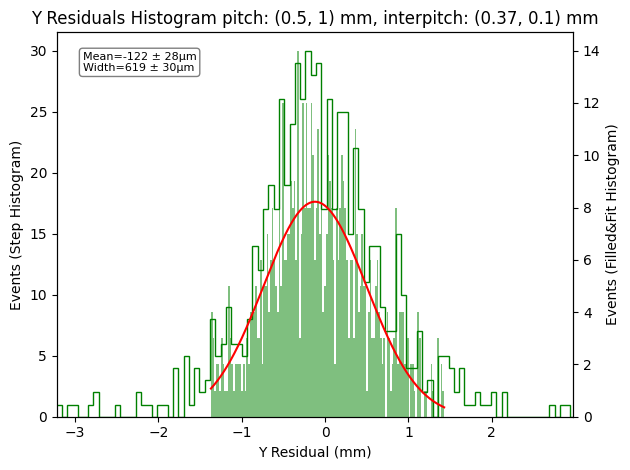

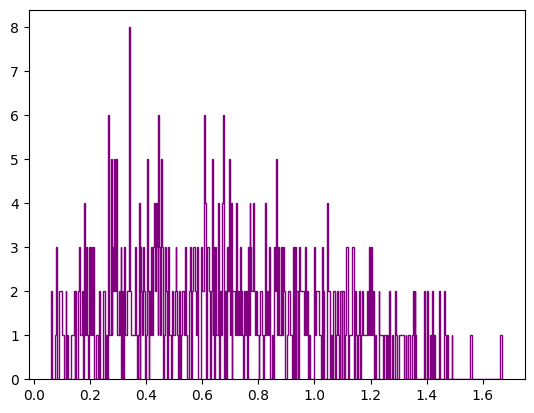

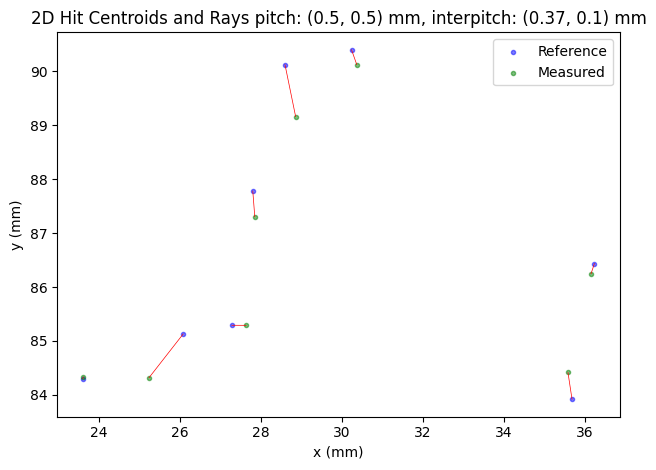

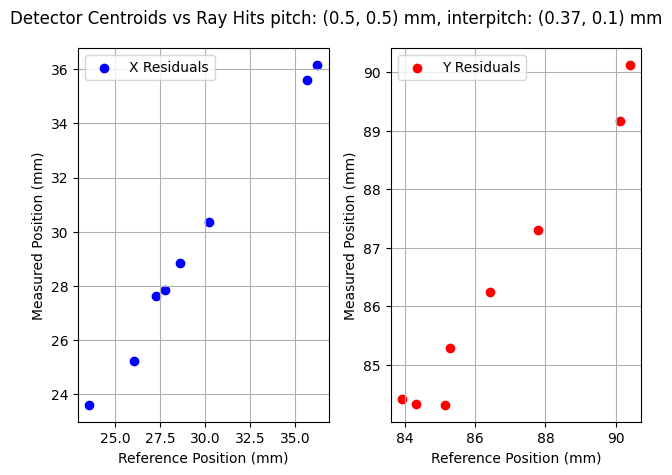

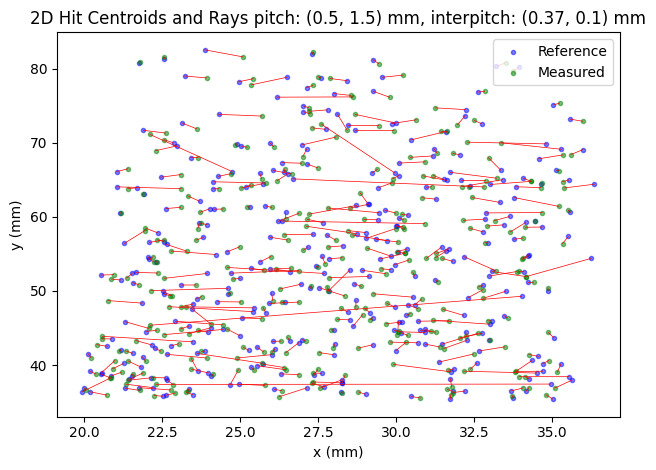

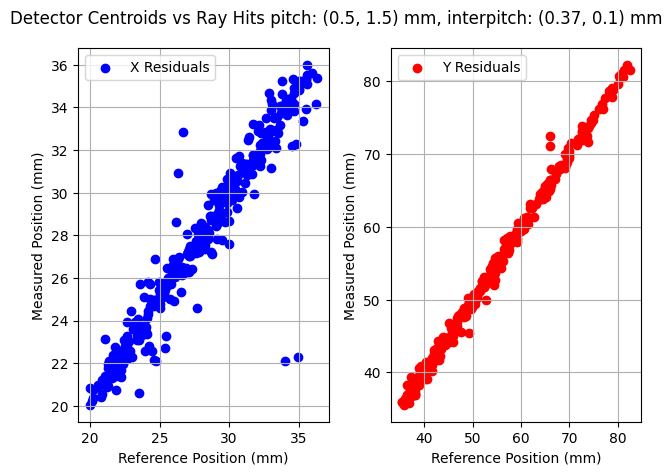

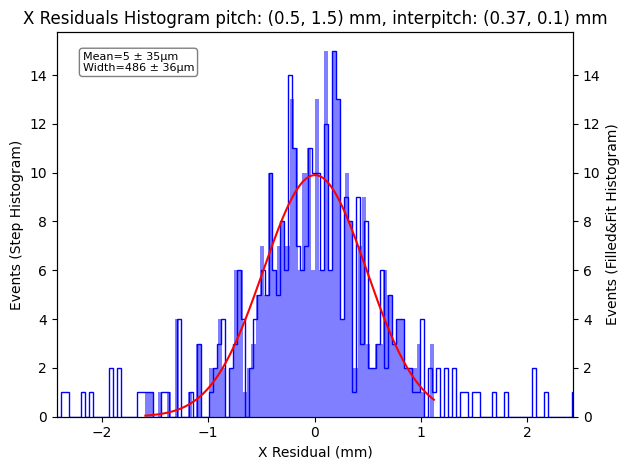

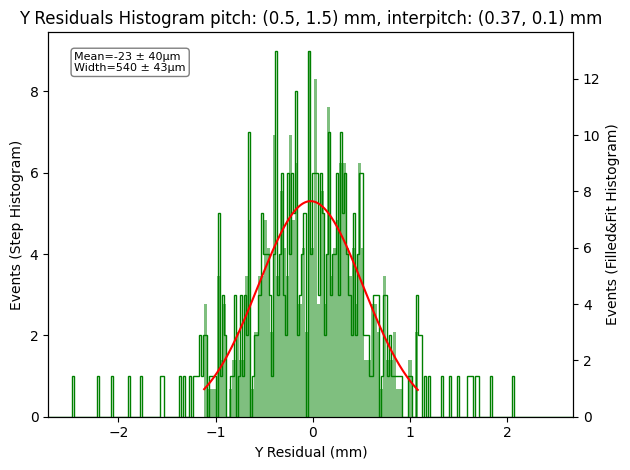

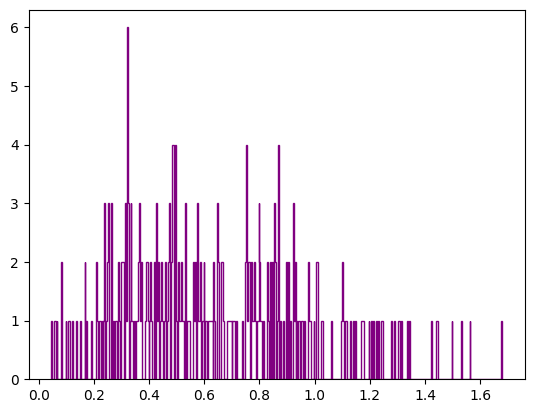

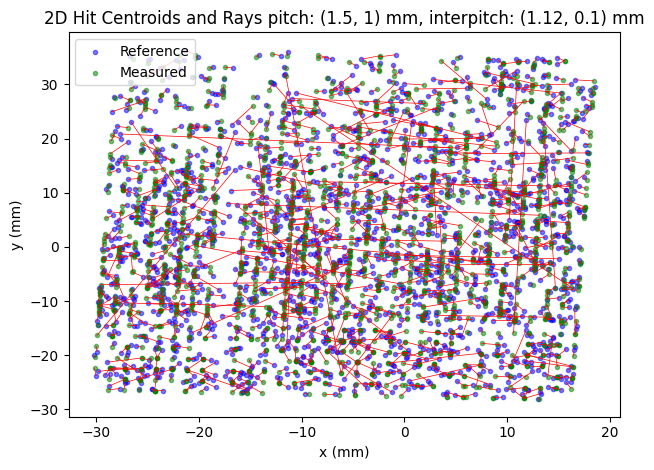

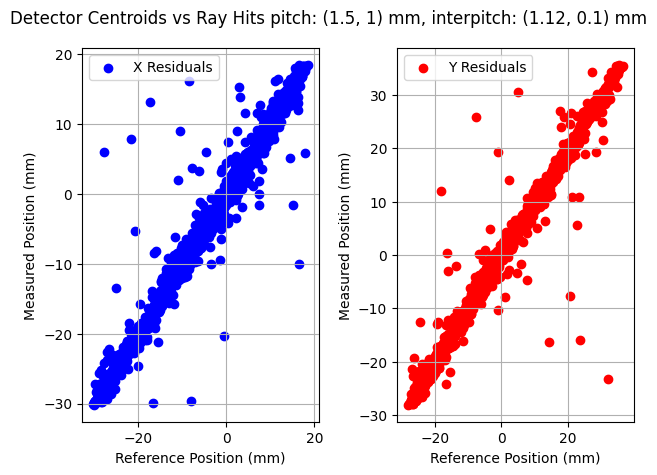

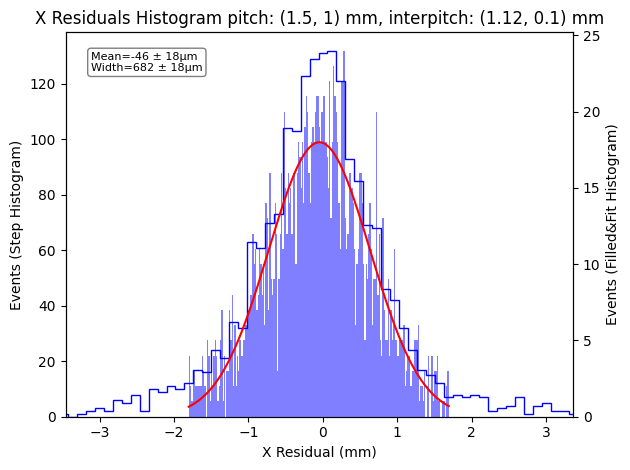

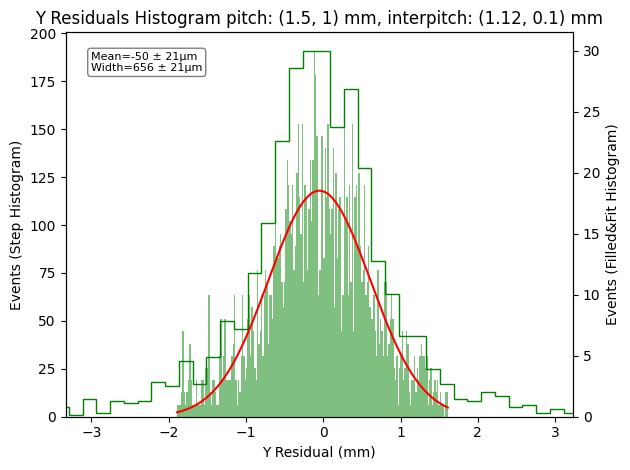

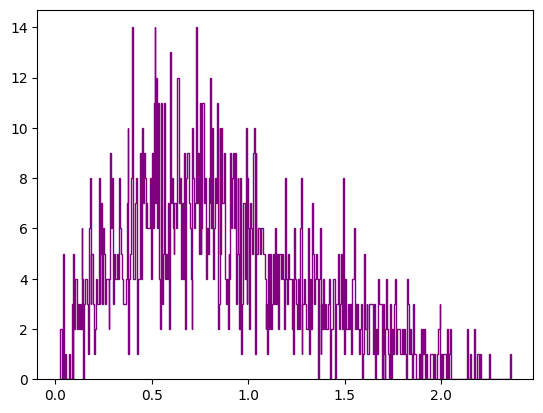

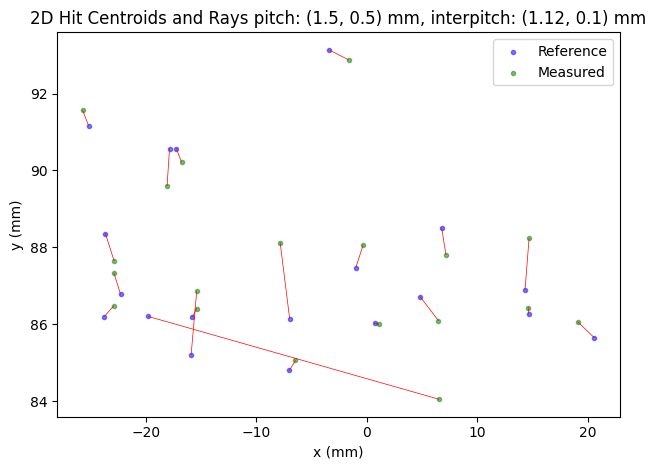

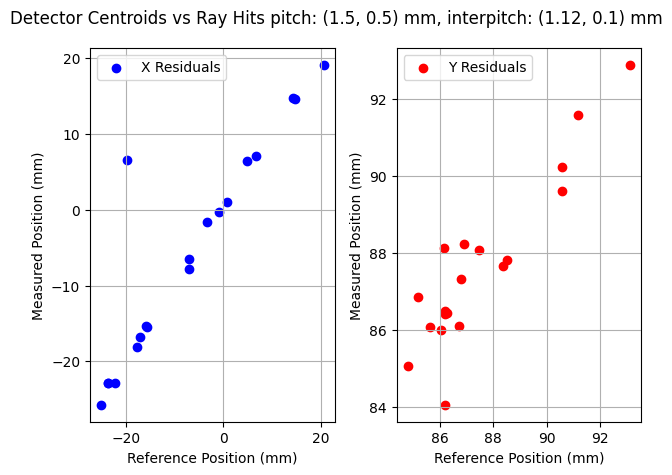

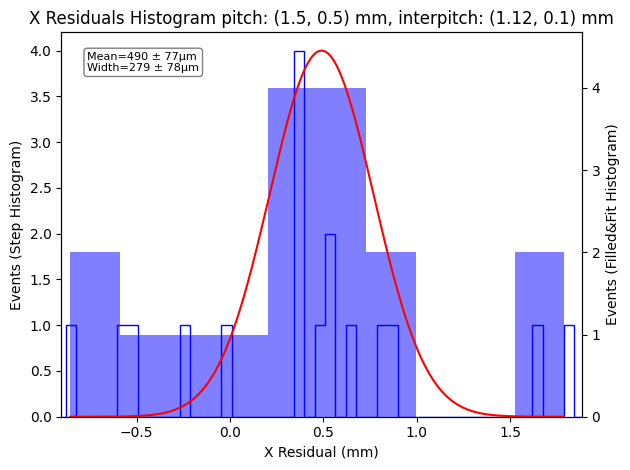

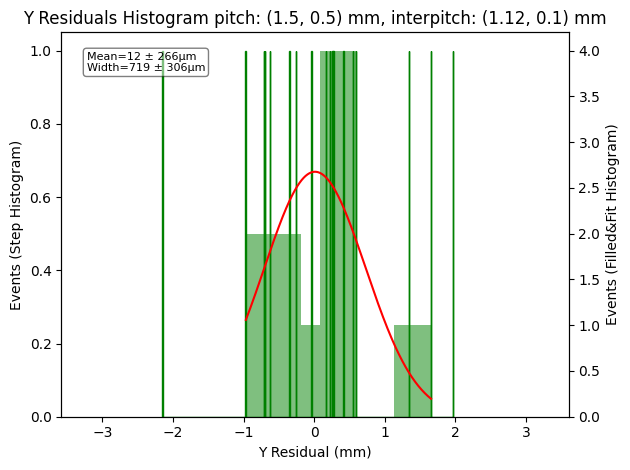

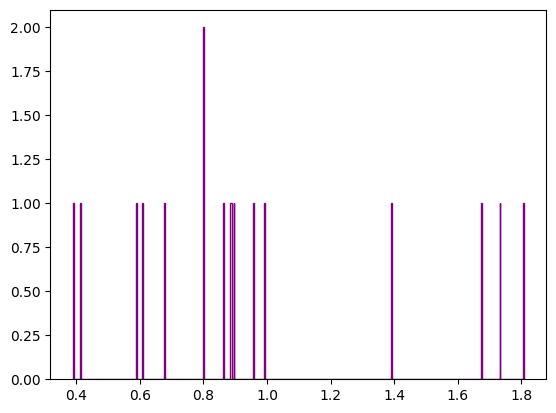

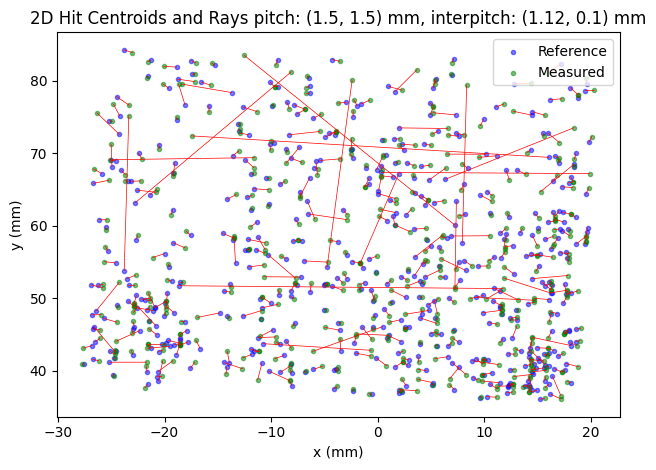

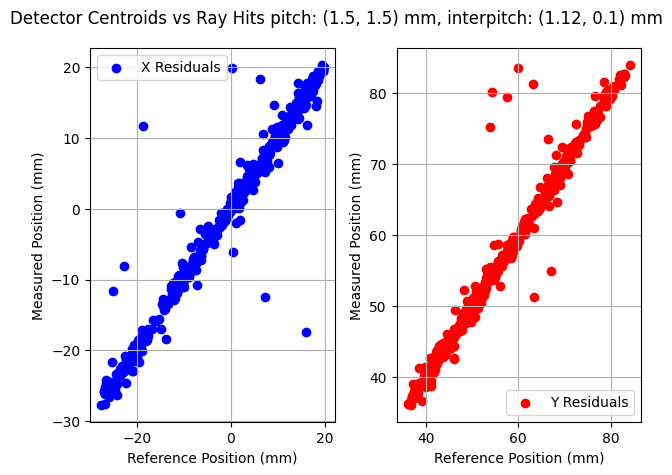

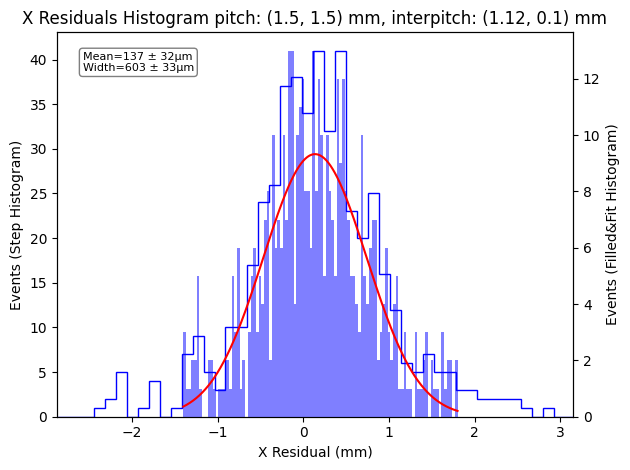

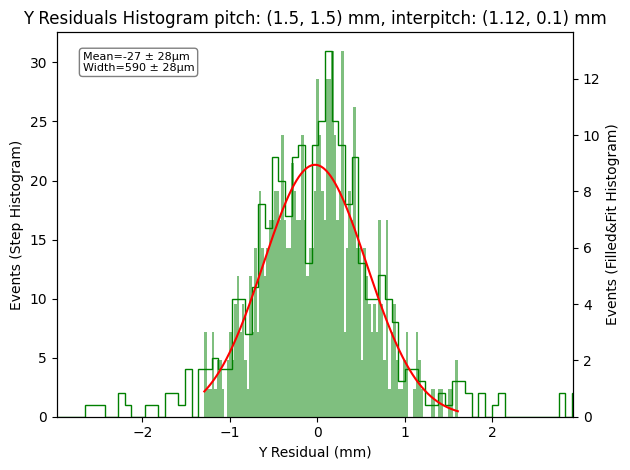

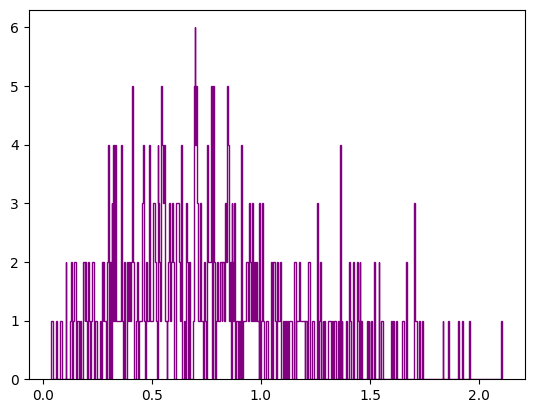

In [18]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

New stuff above